In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Add custom layers for binary classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary output

# Build the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('Data/training_set', target_size=(224, 224), batch_size=32, class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory('Data/test_set', target_size=(224, 224), batch_size=32, class_mode='binary')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Save the trained model
model.save('car_damage_binary_classifier.h5')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Found 3033 images belonging to 2 classes.
Found 767 images belonging to 2 classes.
Epoch 1/10


c:\Users\walte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5129 - loss: 4.1279 - val_accuracy: 0.4967 - val_loss: 0.6930
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.4978 - loss: 0.6929 - val_accuracy: 0.4980 - val_loss: 0.6903
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.5040 - loss: 0.6920 - val_accuracy: 0.5007 - val_loss: 0.6932
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.5124 - loss: 0.6929 - val_accuracy: 0.5033 - val_loss: 0.6930
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4788 - loss: 0.6912 - val_accuracy: 0.5007 - val_loss: 0.6931
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 992ms/step - accuracy: 0.5011 - loss: 0.6926 - val_accuracy: 0.5007 - val_loss: 0.6931
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.4957 - loss: 0.6932 - val_accuracy: 0.5007 - val_loss: 0.6931
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5066 - loss: 0.6930 - val_accuracy: 0.5007 - val_loss: 0.6931

In [2]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('car_damage_binary_classifier.h5')


In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Add an extra dimension to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [5]:
def predict_damage(img_path):
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    # Get the predicted class
    if prediction[0][0] > 0.5:
        return "Bad Condition"
    else:
        return "Good Condition"

# Example usage
result = predict_damage('Data/test_set/good/good100.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Good Condition


In [7]:
def predict_multiple(images):
    results = {}
    for img_path in images:
        results[img_path] = predict_damage(img_path)
    return results

# Example usage
image_paths = ['Data/test_set/damage/damage1.jpg', 'Data/test_set/damage/damage379.jpg']
predictions = predict_multiple(image_paths)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
{'Data/test_set/damage/damage1.jpg': 'Good Condition', 'Data/test_set/damage/damage379.jpg': 'Good Condition'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


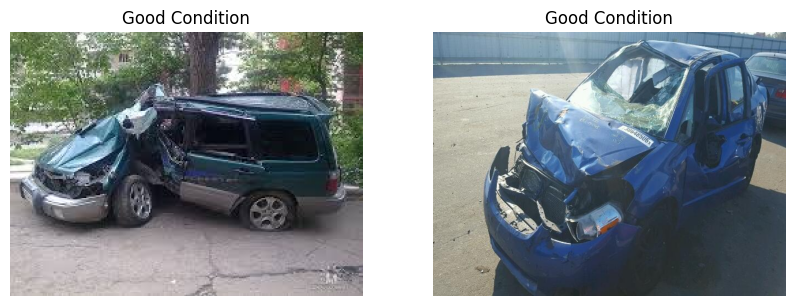

In [8]:
import matplotlib.pyplot as plt

def display_results(image_paths):
    predictions = predict_multiple(image_paths)
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        img = image.load_img(img_path)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.title(predictions[img_path])
        plt.axis('off')
    plt.show()

# Example usage
display_results(image_paths)
